In [76]:
# import libraries 
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import umap

# ignore warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', None)

np.random_state = 42

In [120]:
data = pd.read_csv('Data/team_batting_basic', index_col = 0)
data_clust = data.drop(columns = ['name', 'Team', 'Age'])
data

,name,attendance,W,L,Season,Team,Age,G,AB,PA,H,1B,2B,3B,HR,R,RBI,BB,IBB,SO,HBP,SF,SH,GDP,SB,CS,AVG,BB%,K%,BB/K,OBP,SLG,OPS,ISO,BABIP
0,Baltimore Orioles,1187849.0,89,65,1960.0,BAL,29.0,2067.0,5170.0,5911.0,1307.0,945.0,206.0,33.0,123.0,682.0,640.0,596.0,36.0,800.0,36.0,37.0,72.0,127.0,37.0,24.0,0.253,0.101,0.135,0.75,0.332,0.377,0.709,0.124,0.276
1,Boston Red Sox,1129866.0,65,89,1960.0,BOS,28.0,2045.0,5215.0,5931.0,1359.0,969.0,234.0,32.0,124.0,658.0,623.0,570.0,33.0,799.0,25.0,51.0,70.0,153.0,34.0,28.0,0.261,0.096,0.135,0.71,0.333,0.389,0.722,0.128,0.284
2,Chicago White Sox,1644460.0,87,67,1960.0,CHW,30.0,1948.0,5191.0,5966.0,1402.0,1010.0,242.0,38.0,112.0,741.0,684.0,567.0,36.0,648.0,54.0,59.0,95.0,133.0,122.0,48.0,0.270,0.095,0.109,0.88,0.345,0.396,0.741,0.126,0.287
3,Chicago Cubs,809770.0,60,94,1960.0,CHC,27.0,2121.0,5311.0,5960.0,1293.0,913.0,213.0,48.0,119.0,634.0,600.0,531.0,69.0,897.0,19.0,35.0,64.0,109.0,51.0,34.0,0.243,0.089,0.151,0.59,0.313,0.369,0.681,0.125,0.271
4,Cincinnati Reds,663486.0,67,87,1960.0,CIN,27.0,2021.0,5289.0,5940.0,1324.0,914.0,230.0,40.0,140.0,640.0,604.0,512.0,44.0,858.0,34.0,45.0,60.0,110.0,73.0,37.0,0.250,0.086,0.144,0.60,0.318,0.388,0.706,0.138,0.273
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1640,St. Louis Cardinals,2102530.0,90,72,2021.0,STL,28.0,2384.0,5351.0,6001.0,1303.0,822.0,261.0,22.0,198.0,706.0,678.0,478.0,32.0,1341.0,86.0,44.0,40.0,99.0,89.0,22.0,0.244,0.080,0.223,0.36,0.313,0.412,0.725,0.168,0.287
1641,Tampa Bay Rays,761072.0,100,62,2021.0,TBD,28.0,2389.0,5507.0,6213.0,1336.0,790.0,288.0,36.0,222.0,857.0,810.0,585.0,27.0,1542.0,72.0,41.0,6.0,75.0,88.0,42.0,0.243,0.094,0.248,0.38,0.321,0.429,0.750,0.186,0.294
1642,Texas Rangers,2110258.0,60,102,2021.0,TEX,27.0,2252.0,5405.0,5943.0,1254.0,838.0,225.0,24.0,167.0,625.0,598.0,433.0,10.0,1381.0,58.0,31.0,16.0,113.0,106.0,29.0,0.232,0.073,0.232,0.31,0.294,0.375,0.670,0.143,0.280
1643,Toronto Blue Jays,805901.0,91,71,2021.0,TOR,28.0,2383.0,5476.0,6070.0,1455.0,895.0,285.0,13.0,262.0,846.0,816.0,496.0,14.0,1218.0,51.0,35.0,10.0,112.0,81.0,20.0,0.266,0.082,0.201,0.41,0.330,0.466,0.797,0.200,0.296


In [121]:
embedding = umap.UMAP(n_neighbors=200, min_dist=.9).fit_transform(data_clust)

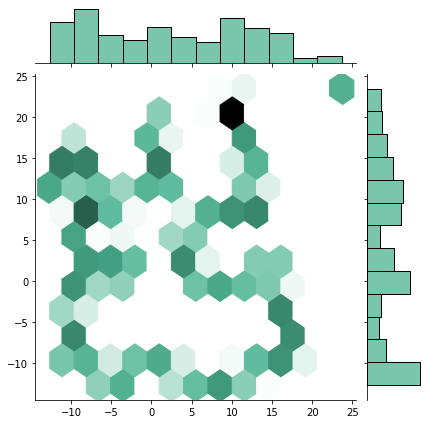

In [122]:
sns.jointplot(*embedding.T, kind="hex", color="#4CB391")
plt.show()

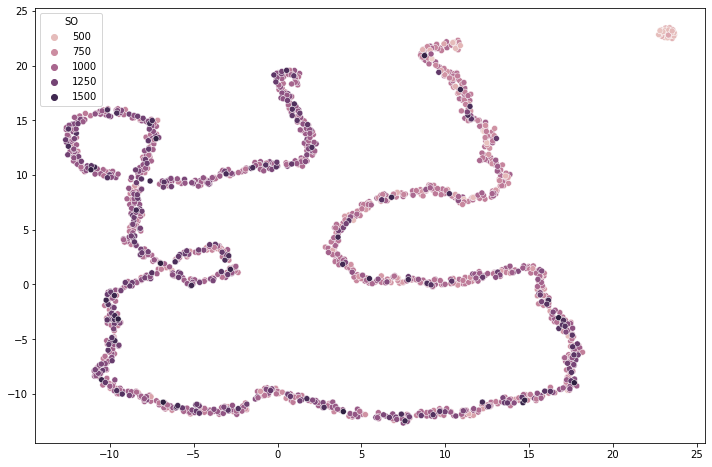

In [125]:
fig, ax = plt.subplots(figsize = (12,8))

sns.scatterplot(*embedding.T, hue = data['SO'])
plt.show()